<a href="https://colab.research.google.com/github/adamcardoso/data-analysis-project-Agricultural-Raw-Material-prices/blob/main/AgriculturalRawMaterial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Agricultural Raw Material prices (1990-2020)**

https://www.kaggle.com/datasets/kianwee/agricultural-raw-material-prices-19902020

In [32]:
# import required packages
import numpy as np
import pandas as pd

**Carregando o conjunto de dados em um quadro de dados usando Pandas**

In [33]:
# @title
df = pd.read_csv('agricultural_raw_material.csv')

**Explorando o conjunto de dados**

In [34]:
df.info

# checking null values of each column
df.isnull().sum()


Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

**Lidar com dados ausentes, incorretos e inválidos**

In [35]:
# Replacing %, "," and "-"
#deixando colunas em minúsculo
df.columns = [str(i).lower() for i in df.columns]

#substituindo registros inválidos por null
df = df.replace('%', '', regex = True)
df = df.replace(',', '', regex = True)
df = df.replace('-', '', regex = True)
df = df.replace('', np.nan)
df = df.replace('MAY90', np.nan)

#excluindo registros inválidos
df = df.dropna()

#verificando se ainda há nulos
df.isnull().sum()

#convertendo para float
lst = df.columns[1:]
df[lst] = df[lst].astype('float')

df.dtypes

month                            object
coarse wool price               float64
coarse wool price % change      float64
copra price                     float64
copra price % change            float64
cotton price                    float64
cotton price % change           float64
fine wool price                 float64
fine wool price % change        float64
hard log price                  float64
hard log price % change         float64
hard sawnwood price             float64
hard sawnwood price % change    float64
hide price                      float64
hide price % change             float64
plywood price                   float64
plywood price % change          float64
rubber price                    float64
rubber price % change           float64
softlog price                   float64
softlog price % change          float64
soft sawnwood price             float64
soft sawnwood price % change    float64
wood pulp price                 float64
wood pulp price % change        float64


In [36]:
df.head()

,month,coarse wool price,coarse wool price % change,copra price,copra price % change,cotton price,cotton price % change,fine wool price,fine wool price % change,hard log price,...,plywood price,plywood price % change,rubber price,rubber price % change,softlog price,softlog price % change,soft sawnwood price,soft sawnwood price % change,wood pulp price,wood pulp price % change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


**Colunas de data e horascolunas**

formatando a coluna datetime e definindo-a como índice para o conjunto de dados

In [42]:
df.month = pd.to_datetime(df.month.str.upper(), format = '%b%y', yearfirst=False)

# Indexing month
df = df.set_index('month')

AttributeError: ignored

In [43]:
df.head()

,month,coarse wool price,coarse wool price % change,copra price,copra price % change,cotton price,cotton price % change,fine wool price,fine wool price % change,hard log price,...,plywood price,plywood price % change,rubber price,rubber price % change,softlog price,softlog price % change,soft sawnwood price,soft sawnwood price % change,wood pulp price,wood pulp price % change
1,1990-05-01,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


Análise Exploratória e Visualização. Vamos começar importando matplotlib.pyplot e seaborn

In [45]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Mapa de calor**

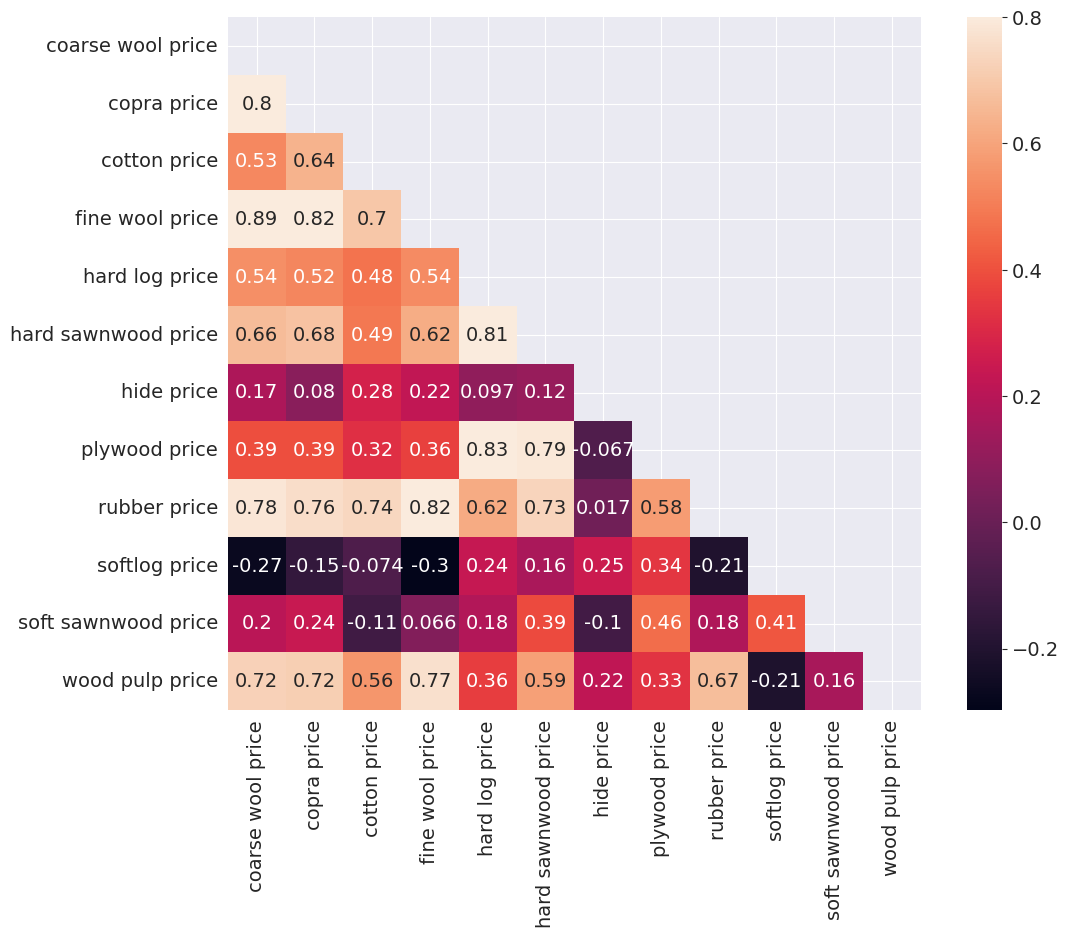

In [49]:
#raw-materials list
raw_data=['coarse wool price', 'copra price', 'cotton price', 'fine wool price', 'hard log price', 'hard sawnwood price', 'hide price', 'plywood price', 'rubber price', 'softlog price', 'soft sawnwood price', 'wood pulp price']

#getting the correlation matrix
corrmat = df[raw_data].corr()

#setting the size of plot
fig = plt.figure(figsize = (12, 9))

#masking the upper traingle part since matrix is symmetric (repetitive)
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8, mask=mask, square = True, annot = True)
plt.show()